<a href="https://colab.research.google.com/github/Syamkrishna123/ICTK_ML_AI_ASSIGNMENTS/blob/main/syam_krishna_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) IMPORTING NECESSARY LIBRARIES

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix,classification_report

# READING THE DATASET

In [2]:
df= pd.read_csv('/content/suv_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


One object datatype and 4 integer data type are present inside this datatset

**DESCRIBINIG NUMERICAL VALUES**

In [4]:
df[['Age','EstimatedSalary']].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


**DESCRIBING CATEGORICAL VALUES**

In [5]:
df.describe(include= 'object')

,Gender
count,400
unique,2
top,Female
freq,204


Here we can set USER ID as index

In [6]:
df.set_index('User ID',inplace= True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


# 2) PREPROCESSING

CHECKING FOR ANY NULL VALUES

In [7]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

There is no null values inside this dataset

CHECKING FOR OUTLIERS

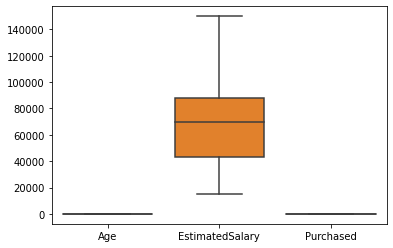

In [8]:
sns.boxplot(data= df)

**ENCODING**

In [9]:
encoder= LabelEncoder()

In [12]:
df['Gender']=encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,1,19,19000,0
15810944,1,35,20000,0
15668575,0,26,43000,0
15603246,0,27,57000,0
15804002,1,19,76000,0


In [13]:
X= df.drop('Purchased',axis=1)
y= df['Purchased']
X.head()

,Gender,Age,EstimatedSalary
User ID,,,
15624510,1,19,19000
15810944,1,35,20000
15668575,0,26,43000
15603246,0,27,57000
15804002,1,19,76000


In [14]:
y.head()

User ID
15624510    0
15810944    0
15668575    0
15603246    0
15804002    0
Name: Purchased, dtype: int64

In [15]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25, random_state= 10)

**SCAILING**

In [16]:
scaler= StandardScaler()

In [17]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

After scailing we can perform model creation and find out which classification model predicts the best result

### **LOGISTIC REGRESSION**

In [25]:
regressor= LogisticRegression()

In [26]:
regressor.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred= regressor.predict(X_test)

**PERFORMANCE METRICS**

In [29]:
print('accuracy score:', accuracy_score(y_pred, y_test))
print('confusion matrix:', confusion_matrix(y_pred, y_test))
print('classification report', classification_report(y_pred,y_test))

accuracy score: 0.9
confusion matrix: [[64  5]
 [ 5 26]]
classification report               precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       0.84      0.84      0.84        31

    accuracy                           0.90       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100



# **KNN**

In [31]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred= knn.predict(X_test)

In [33]:
print('accuracy score:', accuracy_score(knn_pred, y_test))
print('confusion matrix:', confusion_matrix(knn_pred, y_test))
print('classification report', classification_report(knn_pred,y_test))

accuracy score: 0.92
confusion matrix: [[63  2]
 [ 6 29]]
classification report               precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.94      0.83      0.88        35

    accuracy                           0.92       100
   macro avg       0.92      0.90      0.91       100
weighted avg       0.92      0.92      0.92       100



# **NAIVE BAYES**

In [34]:
naive = GaussianNB()
naive.fit(X_train, y_train)
naive_pred= naive.predict(X_test)

In [35]:
print('accuracy score:', accuracy_score(naive_pred, y_test))
print('confusion matrix:', confusion_matrix(naive_pred, y_test))
print('classification report', classification_report(naive_pred,y_test))

accuracy score: 0.91
confusion matrix: [[64  4]
 [ 5 27]]
classification report               precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



# **SUPPORT VECTOR MACHINE**

In [38]:
svm= SVC(kernel= 'linear', C=1, gamma= 'auto')
svm.fit(X_train, y_train)
svm_pred= svm.predict(X_test)

In [39]:
print('accuracy score:', accuracy_score(svm_pred, y_test))
print('confusion matrix:', confusion_matrix(svm_pred, y_test))
print('classification report', classification_report(svm_pred,y_test))

accuracy score: 0.9
confusion matrix: [[64  5]
 [ 5 26]]
classification report               precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       0.84      0.84      0.84        31

    accuracy                           0.90       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100



From this by taking the accuracy score classification algorithm, KNearest Neighbours performs very well than other classification algorithm, which have 0.92 accuracy. From this we can conclude that KNN is the best classification algorithm for this dataset, which predicts wheather a coustmer buys the car or not.